# Instalação de Pacotes

In [3]:
# !pip install -q --upgrade pip
# !pip install -q torch torchvision --extra-index-url https://download.pytorch.org/whl/cu118
# !pip install -q diffusers[torch] transformers accelerate safetensors
# !pip install -q pillow matplotlib scikit-image
# !pip install -q realesrgan

In [2]:
import os
from PIL import Image
import torch
from diffusers import StableDiffusionUpscalePipeline
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, peak_signal_noise_ratio

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionUpscalePipeline.from_pretrained(
    "stabilityai/stable-diffusion-x4-upscaler",
    torch_dtype=torch.float16 if device=="cuda" else torch.float32,
)
pipe = pipe.to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


# Upload de Imagem

Saving 2014-06_East_Jerusalem_090_(14936890061).jpg to 2014-06_East_Jerusalem_090_(14936890061) (1).jpg


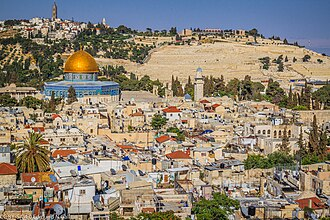

In [3]:
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
lr = Image.open(filename).convert("RGB")
lr

# Super Resolution

In [9]:
def upscale_diffusion(img: Image.Image,
                      prompt="highly detailed, photorealistic",
                      steps=5,
                      scale=7.5):
    with torch.autocast("cuda"):
        out = pipe(
            prompt=prompt,
            image=img,
            num_inference_steps=steps,
            guidance_scale=scale
        )
    return out.images[0]

hr = upscale_diffusion(lr)
hr.save("upscaled_diffusion.png")

  0%|          | 0/5 [00:00<?, ?it/s]

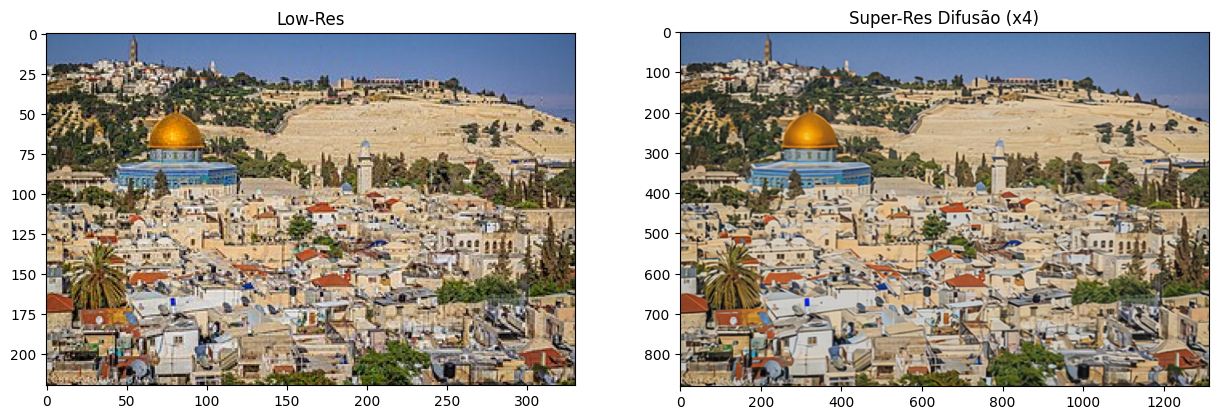

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1); plt.imshow(lr); plt.title("Low-Res")
plt.subplot(1,2,2); plt.imshow(hr); plt.title("Super-Res Difusão (x4)")
plt.show()